In [1]:
import pandas as pd
import importlib
import modules
import numpy as np
import matplotlib.pyplot as plt
import cleanup

# wage_offer_unit_of_pay_9089

In [2]:
col_list = ["wage_offer_unit_of_pay_9089"]
visas_df = pd.read_csv('../data/us_perm_visas.csv', usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (150) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
visas_df.value_counts()

wage_offer_unit_of_pay_9089
Year                           230591
yr                              19733
Hour                             7038
hr                                781
Week                              142
Month                              81
wk                                 30
mth                                21
Bi-Weekly                          20
bi                                  9
dtype: int64

In der Spalte `wage_offer_unit_of_pay_9089` sind Kurz und Langschreibweise der Einheiten im Wechsel vorhanden.
Es soll visualisiert werden, wie diese unterschiede in den Schreibweise zustandegekommen sind.

In [4]:
unit_abbreviations = {
    "Year": "long",
    "Month": "long",
    "Bi-Weekly": "long",
    "Week": "long",
    "Hour": "long",
    "yr": "short",
    "mth": "short",
    "bi": "short",
    "wk": "short",
    "hr": "short",
    }

visas_df["wage_offer_unit_of_pay_9089"]= visas_df["wage_offer_unit_of_pay_9089"].replace(unit_abbreviations)

In [5]:
visas_df["Langschreibweise"] = visas_df["wage_offer_unit_of_pay_9089"]== "long"
visas_df["Kurzschreibweise"] = visas_df["wage_offer_unit_of_pay_9089"]== "short"

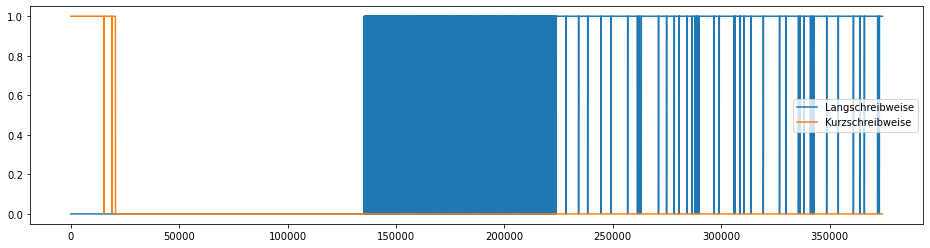

In [6]:
visas_df["Langschreibweise"].astype(int).plot(x='index', figsize=(16,4)).legend()
visas_df["Kurzschreibweise"].astype(int).plot(x='index', figsize=(16,4)).legend()

Am Anfang des Datensatzes ist auschließlich die Kurzschreibweise vorzufinden, dies ändert sich ungefähr ab Index 125.000.

Die Bereinigung findet in der cleanup.py in der Funktion `normalize_pay_unit_columns` durch ein dictionary statt.

# wage_offer_from

Das Gehaltsangebot ist im Datensatz in zwei Spalten vorzufinden.
In den Spalten `wage_offer_from_9089` and `wage_offered_from_9089`.
Diese beiden Spalten müssen zusammengeführt werden.

In [7]:
col_list= ["wage_offer_from_9089", "wage_offered_from_9089"]
visas_df = pd.read_csv("../data/us_perm_visas.csv", usecols=col_list)


C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (148) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
visas_df.sample(20)

,wage_offer_from_9089,wage_offered_from_9089
13309,101888,NaN
137198,"100,110.00",NaN
88245,NaN,124000.0
115019,NaN,101899.0
370508,"56,846.00",NaN
1784,140000,NaN
165342,"72,467.00",NaN
97868,NaN,80000.0
353022,"168,000.00",NaN
252546,90418,NaN


In [9]:
visas_df.dtypes

wage_offer_from_9089       object
wage_offered_from_9089    float64
dtype: object

`wage_offered_from_9089` wurde erfolgreich als float importiert.
Jedoch werden noch einen genaueren Blick auf `wage_offer_from_9089` werfen müssen um es in einen float werden umzuwandeln.

Die Werte in den beiden vorliegenden Spalten sind wie folgt verteilt.

wage_offer_from_9089
259591/374362 69%
Filled: |██████████████████████████████████----------------| 69.3% Rows

wage_offered_from_9089
114647/374362 31%
Filled: |███████████████-----------------------------------| 30.6% Rows



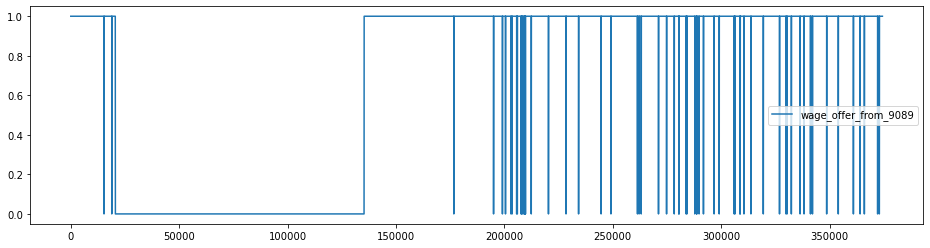

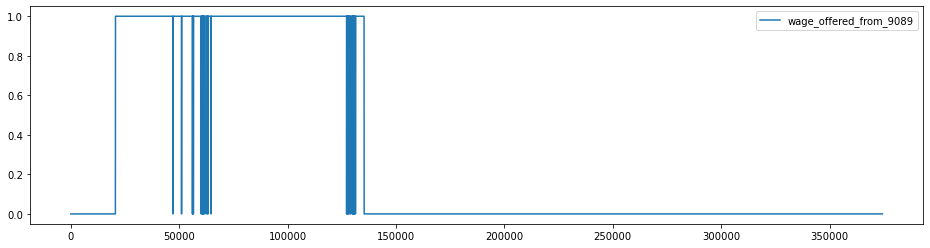

In [10]:
modules.print_count_of_values_relation(visas_df, True, True)

Zur Erläuterung der resultierenden Graphen:

Die X-Achse zeigt den Index aller Werte. Wir haben über 350000 Werte (Zeilen) in unserem Datensatz.

Die Y-Achse zeigt an, ob eine Zeile mit einem tatsächlichen Wert gefüllt ist. Nicht-NaN-Werte werden als 1 angezeigt, NaN-Werte werden als 0 angezeigt.

Es wird ersichtlich, dass sich beide Spalten gegenseitig ergänzen. Lücken in `wage_offer_from_9098` können mit `wage_offer_from_9098` gefüllt werden.

In [11]:
modules.areTwoColumnsOverlapping(visas_df, "wage_offer_from_9089", "wage_offered_from_9089")

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


False

Die beiden Spalten überlappen nicht.

Die Spalte wage_offered_from_9089 wurde von pandas als object erkannt.
Dies ist der Fall aufgrund der Tausender-Trennzeichen.

Wir führen die Funktion `clean_currency` der cleanup.py aus, welche die enthaltenen Trennzeichen entfernt und wandeln die Spalte`wage_offer_from_9089` zum Datentyp float um.

In [12]:
visas_df["wage_offer_from_9089"] = visas_df["wage_offer_from_9089"].apply(cleanup.clean_currency).astype('float')

In [13]:
visas_df["wage_offer_from_9089"].dtype

dtype('float64')

In [18]:
if visas_df["wage_offer_from_9089"].dtype in [np.dtype('float64'), np.dtype('float32')]:
    print("ya")

ya


Alle Werte wurden zu floats umgewandelt.
Die Spalte `wage_offer_from_9089` wurde erfolgreich bereinigt.

In [16]:
visas_df['wage_offer_from_9089'].median()

91104.0

In [17]:
visas_df.sample(15)

,wage_offer_from_9089,wage_offered_from_9089
147798,80517.00,NaN
13717,87380.00,NaN
338019,36.00,NaN
340165,157477.00,NaN
186782,122179.00,NaN
136772,85176.00,NaN
305488,22949.33,NaN
171884,30000.00,NaN
18105,55000.00,NaN
236674,109762.00,NaN


## Zusammenführen beider Spalten

Alle Nan-Werte werden vorerst mit einer 0 befüllt, anschließend werden beide Spalten aufaddiert.
Wir haben früher bewiesen, das die Spalten nie überlappen.

In [ ]:
visas_df['wage_offer_merged'] = visas_df['wage_offer_from_9089'].fillna(0) + visas_df['wage_offered_from_9089'].fillna(0)

In [ ]:
visas_df.sample(15)

In [ ]:
visas_df['wage_offer_merged'].dtype

In [ ]:
(visas_df['wage_offer_merged'] == 0).sum()

We filled NaN values with 0 in Order to calculate sums. Now we will replaye 0 with NaN to keep the columns cleaned up.
Additionally a wage of 0 would be unrealistic.

In [ ]:
visas_df['wage_offer_merged'].replace(0, np.nan, inplace=True)

In [ ]:
(visas_df['wage_offer_merged'] == 0).sum()

In [ ]:
visas_df['wage_offer_merged'].median()
clean_df = pd.DataFrame()
clean_df['wage_offer_merged'] = visas_df['wage_offer_merged']

In [ ]:
clean_df.head()


---
# Cleaning up wage_offer_unit

In [ ]:
col_list= ["wage_offer_unit_of_pay_9089", "wage_offered_unit_of_pay_9089"]
visas_df = pd.read_csv("../data/us_perm_visas.csv", usecols=col_list)
visas_df.head ()

In [ ]:
visas_df.sample(50)

In [ ]:
visas_df['wage_offer_unit_of_pay_9089'].value_counts()

In [ ]:
visas_df['wage_offered_unit_of_pay_9089'].value_counts()

wage_offer_unit_of_pay_9089 has to be cleaned. We'll deal with this issue after the merge.

In [ ]:
modules.print_count_of_values_relation(visas_df, True, True)

The dristribution of values reveals a problem. Between an index of 25.000 and 75.000 or dataset contains no value for the unit of pay.

We will merge the both columns and take a closer look at the values they are containing.

In [ ]:
visas_df['wage_offer_unit_merged'] = visas_df['wage_offer_unit_of_pay_9089'].fillna('') + visas_df['wage_offered_unit_of_pay_9089'].fillna('')

In [ ]:
visas_df['wage_offer_unit_merged'].replace('', np.nan, inplace=True)

In [ ]:
visas_df['wage_offer_unit_merged'].value_counts()

In [ ]:
unit_abbreviations = {
  "Year": "yr",
  "Month": "mth",
  "Bi-Weekly": "bi",
  "Week": "wk",
  "Hour": "hr"
}

In [ ]:
visas_df['wage_offer_unit_merged'] = visas_df['wage_offer_unit_merged'].replace(unit_abbreviations)

In [ ]:
visas_df['wage_offer_unit_merged'].value_counts()

In [ ]:

modules.print_count_of_values_relation(visas_df, True, True)

The gap remains, considering the gap is realtively small and we have lot's of values, we'll ignore the gap in the further analysis.


In [ ]:
clean_df['wage_offer_unit'] = visas_df['wage_offer_unit_merged']

In [ ]:

clean_df.head()

In [ ]:
clean_df.groupby('wage_offer_unit')['wage_offer_merged'].mean().sort_values()

In [ ]:

modules.print_full(clean_df.groupby('wage_offer_unit')['wage_offer_merged'].describe())

In [ ]:

modules.print_full(clean_df.groupby('wage_offer_unit')['wage_offer_merged'].nlargest(10))

In [ ]:
clean_df.groupby('wage_offer_unit')['wage_offer_merged'].mean().plot()
plt.legend(loc="upper left")
plt.show()

This is unexpected. It was expeced, that hr > week > bi > mth > yr.
Anyway we'll leave all units besides yr unseen and concentrate on yr, which has the most occurences.

In [ ]:
clean_df['wage_offer_unit'].value_counts().plot(kind='pie')

Filter all not yr values

In [ ]:
new_df = clean_df[clean_df["wage_offer_unit"].str.contains("yr", na=False)]

In [ ]:
clean_df.dtypes

In [ ]:
new_df["wage_offer_unit"].size

In [ ]:
new_df.value_counts()

This is unexpected. It was expeced, that hr > week > bi > mth > yr.
Anyway we'll leave all units besides yr unseen and concentrate on yr, which has the most occurences.

In [ ]:
clean_df['wage_offer_unit'].value_counts().plot(kind='pie')

Filter all not yr values

In [ ]:
new_df = clean_df[clean_df["wage_offer_unit"].str.contains("yr", na=False)]

In [ ]:
clean_df.dtypes

In [ ]:
new_df["wage_offer_unit"].size

In [ ]:
new_df.value_counts()

-----------------------

# Unplausible Werte

In [ ]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../own_style.mplstyle')
from scipy.stats import linregress

In [ ]:
# cleanup.generate_cleaned_df()

In [ ]:

col_list = ["prevailing_wage_amount_9089", "prevailing_wage_unit_of_pay_9089"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

In [ ]:
modules.print_full(visas_df.groupby('prevailing_wage_unit_of_pay_9089')['prevailing_wage_amount_9089'].nsmallest(20))

In [ ]:
visas_df["prevailing_wage_unit_of_pay_9089"].value_counts()